<a href="https://colab.research.google.com/github/Manoj-312002/Python/blob/master/Tiatnic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import sklearn as skl 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%cd /content
!git clone https://github.com/Manoj-312002/Python.git 
%cd Python/Titanic

/content
Cloning into 'Python'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 74 (delta 24), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (74/74), done.
/content/Python/Titanic


In [0]:
train = pd.read_csv('train-data.csv')
test = pd.read_csv('test-data.csv')

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text major ticklabel objects>)

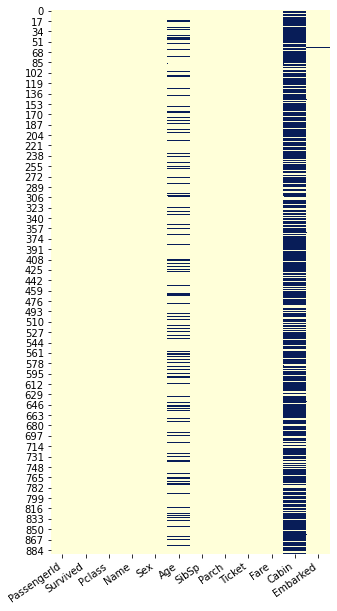

In [5]:
plt.figure(figsize = (5, 10))
sns.heatmap(train.isnull(), cbar=False,cmap='YlGnBu',)
plt.xticks(rotation = 35,horizontalalignment='right',fontweight='light')

In [6]:
train.loc[:5,['Pclass','Name']]

,Pclass,Name
0,3,"Braund, Mr. Owen Harris"
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,3,"Allen, Mr. William Henry"
5,3,"Moran, Mr. James"


In [7]:
idx = pd.IndexSlice
train['Age'].isna().sum()
train.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))
a = 0

def test(x):
    global a
    a+=1
    return x 

train.groupby(['Pclass','Sex'])['Age'].apply(test)
print(a)

6


In [0]:
def test(a):
    return a[1:]
a = train['Cabin'].unique().astype('object')[1:]
a = list(a)
a.sort(key = test)

In [9]:
train['Sex'].map({'female':1,'male':0})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

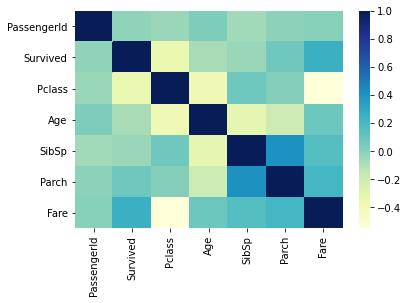

In [10]:
corr = train.corr()
sns.heatmap(corr,cmap = 'YlGnBu')

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [0]:
lgm = LogisticRegression(random_state=64,max_iter=1000)
opt_dict = {'class_weight':['balanced',None],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'C':[0.01, 0.05, 0.07, 0.1, 0.5, 1, 2, 4, 5, 10, 15, 20]}
model = GridSearchCV(lgm,opt_dict,scoring='accuracy',n_jobs=-1)